# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset 


In [105]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [106]:
#reading the training dataset
train=pd.read_csv('MobileTrain.csv')

In [107]:
#displaying top 5 rows
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [108]:
#displaying bottom 5 rows
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [109]:
#displaying 5 random samples
train.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
862,1065,1,0.5,0,0,1,14,0.7,89,2,...,188,928,3078,10,1,18,1,0,1,2
1609,1148,0,2.3,1,0,1,58,0.3,170,5,...,606,688,3127,10,7,11,1,0,0,2
655,1994,0,1.5,1,2,1,7,0.5,146,8,...,447,1435,3622,7,0,20,1,0,1,3
120,1701,1,1.6,1,3,0,10,0.3,194,8,...,550,1338,2598,12,9,6,0,1,0,2
564,574,0,2.8,1,16,0,38,0.1,90,6,...,286,1171,3269,8,7,10,0,1,0,2


In [110]:
#displays concise summary of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [111]:
#displays the datatypes of the dataset
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [112]:
# displays the dimensions of dataset
train.shape

(2000, 21)

In [113]:
#displays the size of dataset
train.size

42000

In [114]:
# shows index of dataset
train.index

RangeIndex(start=0, stop=2000, step=1)

In [115]:
#displays the columns of dataset
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [116]:
#displays statistical summary of the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [117]:
#finds missing values is present or not
train.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [118]:
#shows the number of unique values of each attribute
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [119]:
# displays the memory usage of each attribute
train.memory_usage()

Index              128
battery_power    16000
blue             16000
clock_speed      16000
dual_sim         16000
fc               16000
four_g           16000
int_memory       16000
m_dep            16000
mobile_wt        16000
n_cores          16000
pc               16000
px_height        16000
px_width         16000
ram              16000
sc_h             16000
sc_w             16000
talk_time        16000
three_g          16000
touch_screen     16000
wifi             16000
price_range      16000
dtype: int64

### Exploratory data analysis

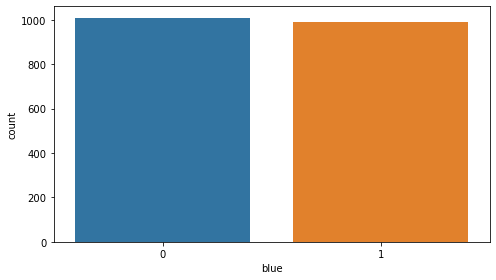

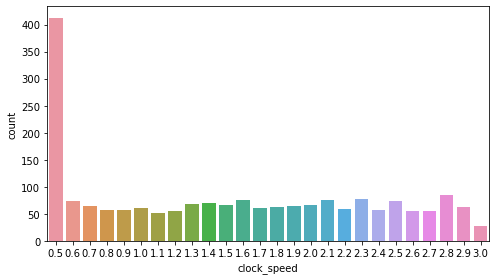

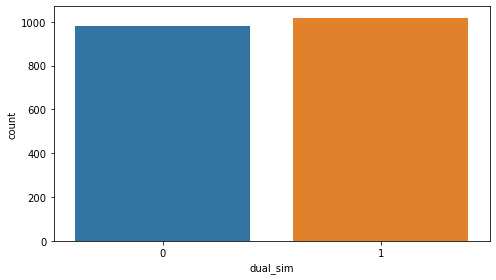

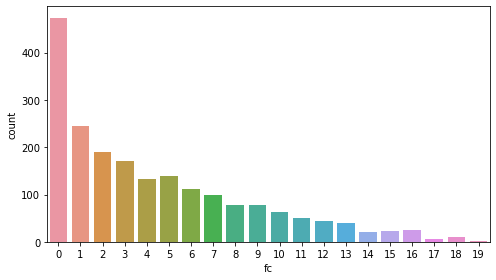

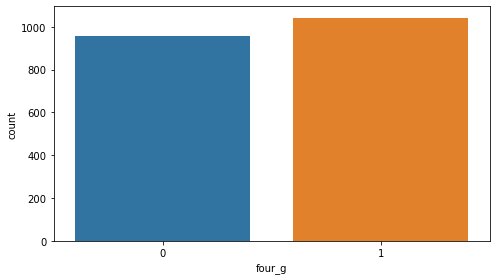

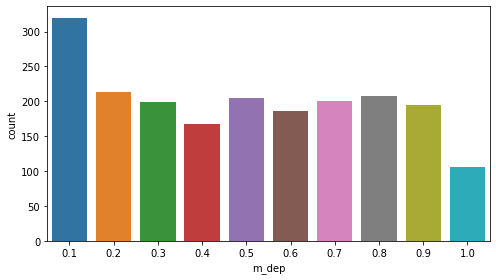

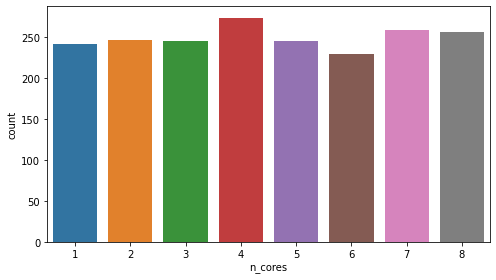

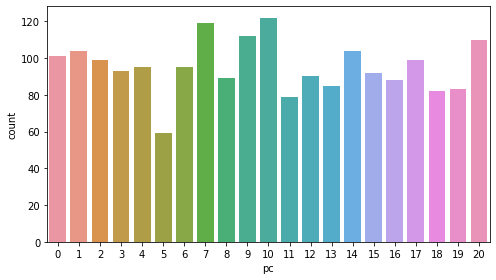

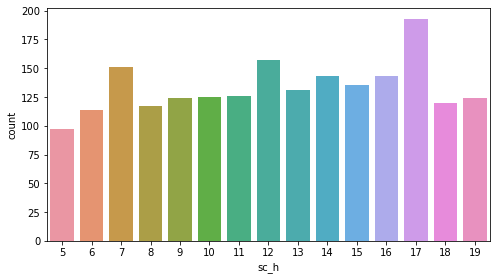

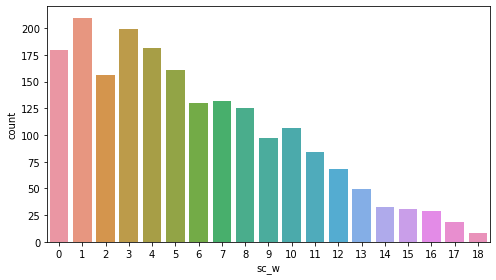

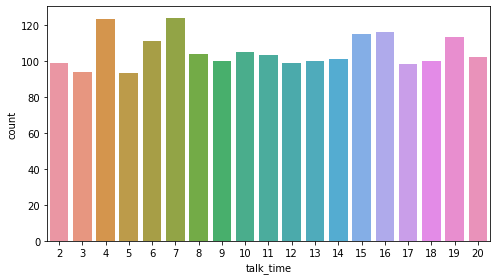

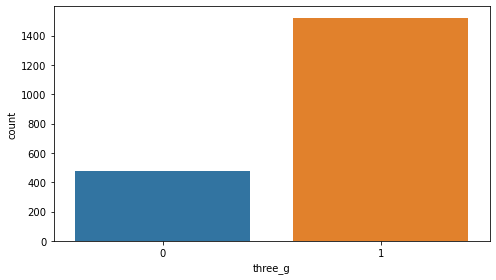

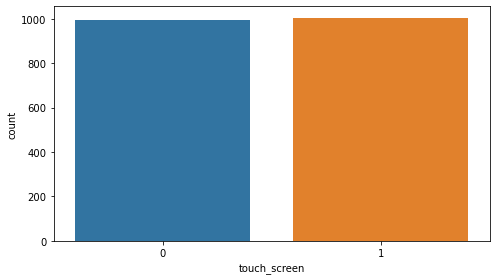

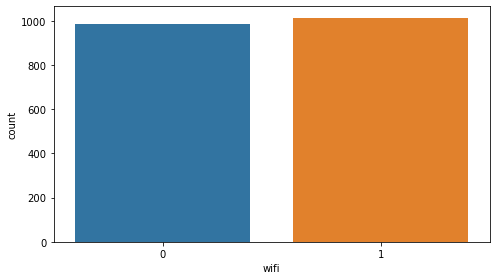

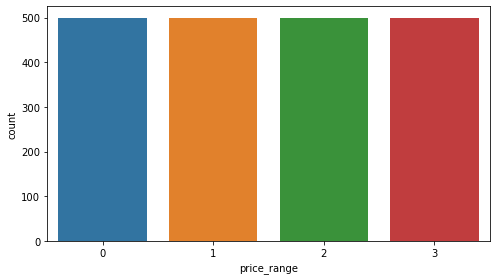

In [120]:
for i in train:
    if (train[i].nunique()<30):
        plt.subplots(figsize=(7,4))
        sns.countplot(x=train[i])
        plt.show()

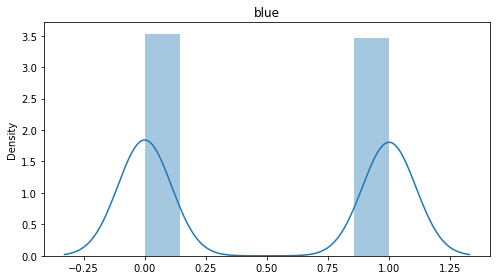

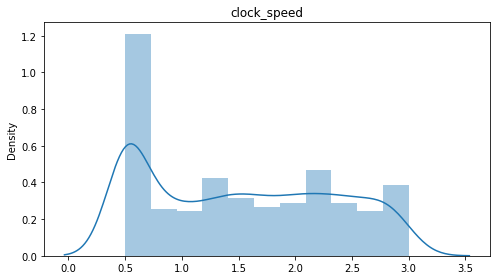

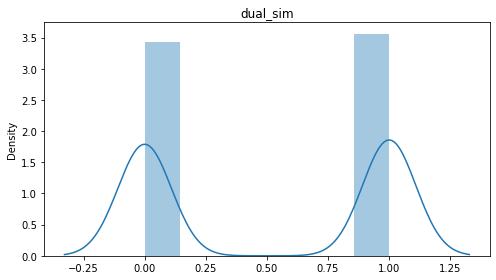

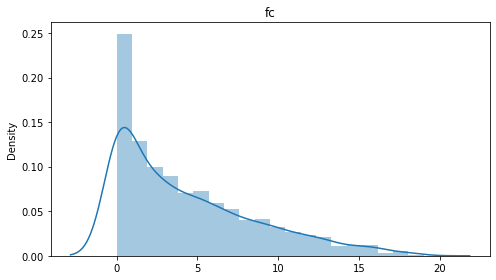

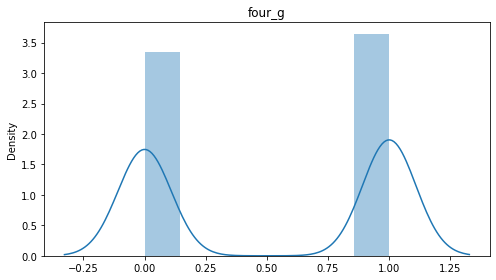

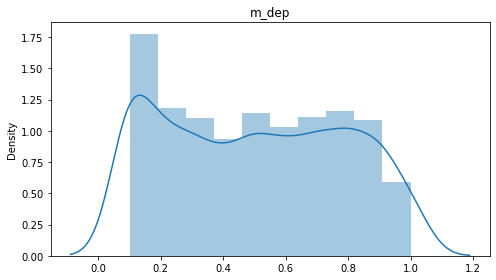

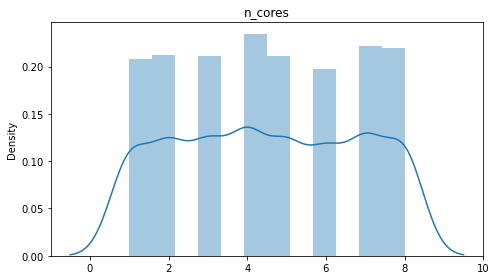

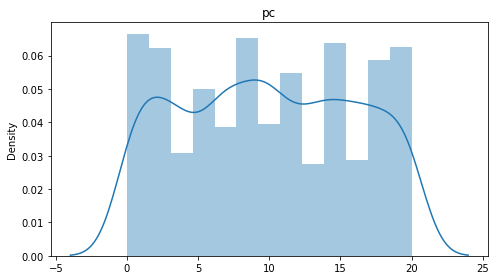

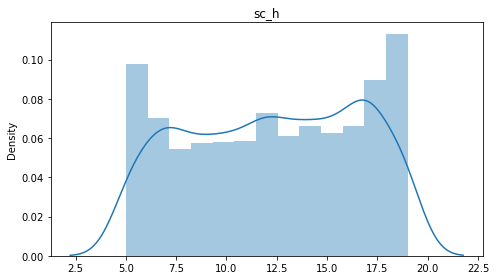

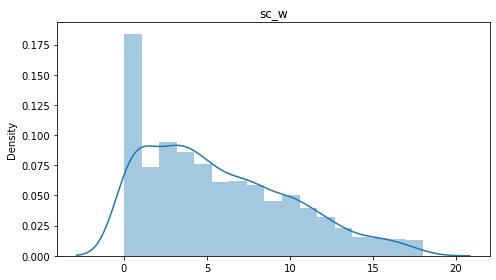

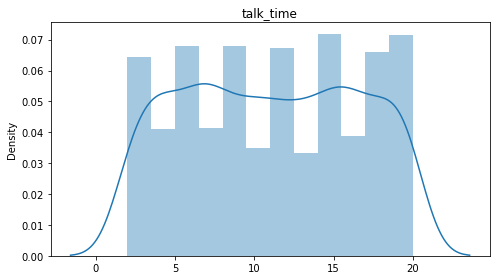

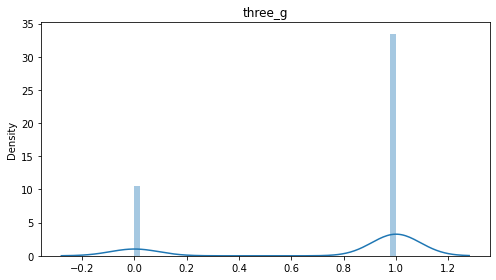

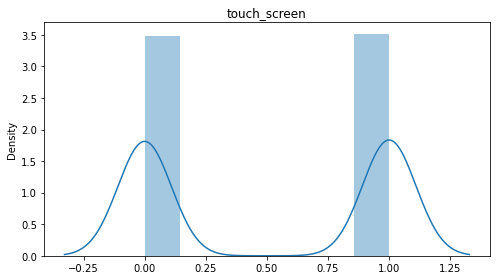

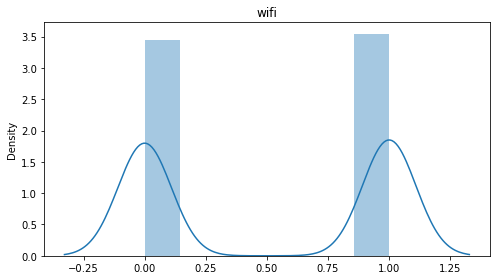

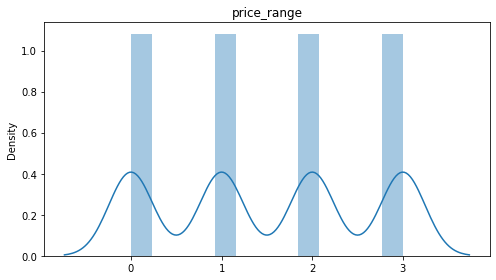

In [121]:
for i in train:
    if (train[i].nunique()<30):
        plt.subplots(figsize=(7,4))
        sns.distplot(x=train[i])
        plt.title(i)
        plt.show()


Text(0.5, 1.0, 'Distribution of Bluetooth status')

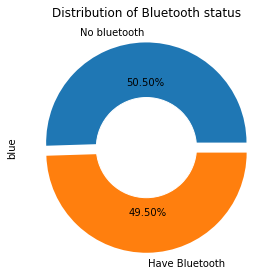

In [122]:
train.blue.value_counts().plot.pie(figsize=(6,4),labels=['No bluetooth','Have Bluetooth'],autopct="%0.2f%%",explode=[0.05,0.05])
circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show
plt.title('Distribution of Bluetooth status',fontsize=12)

Text(0.5, 1.0, 'Number of Cores pie plot')

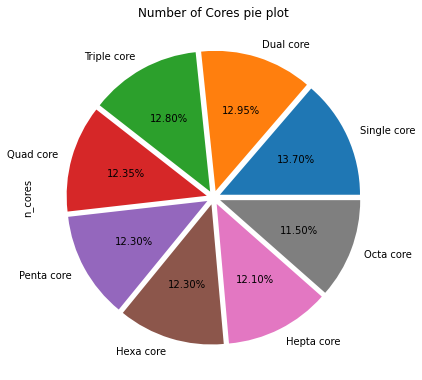

In [123]:
train.n_cores.value_counts().plot.pie(figsize=(6, 10),labels=['Single core','Dual core','Triple core','Quad core','Penta core','Hexa core','Hepta core','Octa core'],autopct="%0.2f%%",explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])
plt.title('Number of Cores pie plot')

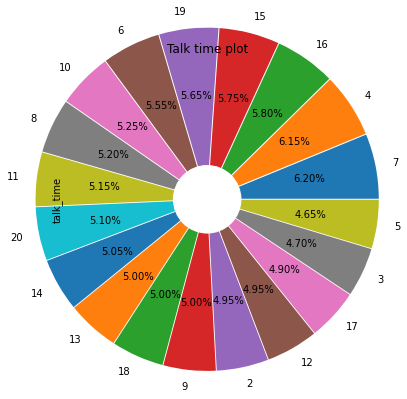

In [124]:
train.talk_time.value_counts().plot.pie(figsize=(6,8),autopct='%1.2f%%',explode=[0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025],radius=1.5)
plt.title('Talk time plot')
circle = plt.Circle( (0,0), 0.3, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()


In [125]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Ranking According to Price Range


In [126]:
data=train
data["rank_by_price"] = data["price_range"].rank()
data1 = data
data1.head()                       

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5


In [127]:
data1["rank_by_price"] = data1["rank_by_price"].sort_values()
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [128]:
data1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


## Ranking on all the features using rank()

In [129]:
data2 = pd.read_csv(r"C:\Users\USER\Desktop\Internship\MobileTrain.csv")
RankedDataset1 = data2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [130]:
#not all features are good when values are high and not all features are good when values are low
# It depends on each and every feature
data3 = data2
data3["rank_by_price"] = data3["price_range"].rank()
data3["rank_by_battery"] = data3["battery_power"].rank(ascending=False)
data3["rank_by_blueooth"] = data3["blue"].rank(ascending=False)
data3["rank_by_clockspeed"] = data3["clock_speed"].rank(ascending=False)
data3["rank_by_DualSIM"] = data3["dual_sim"].rank(ascending=False)
data3["rank_by_fc"] = data3["fc"].rank(ascending=False)
data3["rank_by_4G"] = data3["four_g"].rank(ascending=False)
data3["rank_by_InternalMemory"] = data3["int_memory"].rank(ascending=False)
data3["rank_by_mdep"] = data3["m_dep"].rank(ascending=False)
data3["rank_by_weight"] = data3["mobile_wt"].rank(ascending=True)
data3["rank_by_ncores"] = data3["n_cores"].rank(ascending=False)
data3["rank_by_pc"] =data3["pc"].rank(ascending=False)
data3["rank_by_height"] = data3["px_height"].rank(ascending=False)
data3["rank_by_width"] = data3["px_width"].rank(ascending=False)
data3["rank_by_ram"] = data3["ram"].rank(ascending=False)
data3["rank_by_sch"] = data3["sc_h"].rank(ascending=False)
data3["rank_by_scw"] = data3["sc_w"].rank(ascending=False)
data3["rank_by_talktime"] = data3["talk_time"].rank(ascending=False)
data3["rank_by_3G"] = data3["three_g"].rank(ascending=False)
data3["rank_by_touchscreen"] = data3["touch_screen"].rank(ascending=False)
data3["rank_by_wifi"] = data3["wifi"].rank(ascending=False)
data3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


### Preprocessing

###### I. checking for missing values

In [131]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
rank_by_price    0
dtype: int64

No missing values in the dataset

### MODELLING

In [132]:
#Importing necessary Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [133]:
#initialising the classifiers
DTC = DecisionTreeClassifier(random_state=42)
GNB = GaussianNB()
lr = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)
BB=BernoulliNB()

In [134]:
algos=[DTC,GNB,lr,RFC,KNN,SVM,BB]
names=["Decision Tree Classifier","Gaussian Bayes Claasifier",'Bernoulli Bayes Claasifier',"Logistic Regression",'Random Forest Classifier','K Nearest Neighbor Classifier',"Support Vector Machine Classifier"]

### Modelling without Scaling

In [135]:
X=train.drop(['price_range'],axis=1)
y=train['price_range']
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,rank_by_price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1000.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,559.156801
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,250.500000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,625.500000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1000.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1375.500000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1750.500000


In [136]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [137]:
#Fitting the model and evaluating accuracy_score
score=[]
for name in algos:
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    ac=max(0,100*accuracy_score(y_pred,y_test))
    score.append(ac)

In [138]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy': score})
print(evaluation)

                               Model  Accuracy
0           Decision Tree Classifier    100.00
1          Gaussian Bayes Claasifier    100.00
2         Bernoulli Bayes Claasifier     94.25
3                Logistic Regression    100.00
4           Random Forest Classifier    100.00
5      K Nearest Neighbor Classifier    100.00
6  Support Vector Machine Classifier     24.75


### Modelling on Standard Scaled Data


In [139]:
X=train.drop(['price_range'],axis=1)
y=train['price_range']
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,rank_by_price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1000.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,559.156801
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,250.500000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,625.500000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1000.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1375.500000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1750.500000


In [140]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-1.927347e-16,-2.172151e-16,3.990142e-16,9.230117e-17,-2.048361e-16,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,...,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16,2.184919e-16,3.065326e-16,4.278800e-16,2.975398e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,...,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,-1.341641e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,...,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,-6.708204e-01
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,...,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,0.000000e+00
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,...,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,6.708204e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,...,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,1.341641e+00


In [141]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [142]:
#Fitting the model and evaluating accuracy_score
score=[]
for name in algos:
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    ac=max(0,100*accuracy_score(y_pred,y_test))
    score.append(ac)

In [143]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy': score})
print(evaluation)

                               Model  Accuracy
0           Decision Tree Classifier    100.00
1          Gaussian Bayes Claasifier    100.00
2         Bernoulli Bayes Claasifier    100.00
3                Logistic Regression    100.00
4           Random Forest Classifier     76.75
5      K Nearest Neighbor Classifier    100.00
6  Support Vector Machine Classifier     63.25


### Modelling on MinMax Scaled Data

In [144]:
X=train.drop(['price_range'],axis=1)
y=train['price_range']
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,rank_by_price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1000.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,559.156801
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,250.500000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,625.500000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1000.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1375.500000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1750.500000


In [145]:
#standard scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.372771
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.250000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [147]:
#Fitting the model and evaluating accuracy_score
score=[]
for name in algos:
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    ac=max(0,100*accuracy_score(y_pred,y_test))
    score.append(ac)

In [148]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy': score})
print(evaluation)

                               Model  Accuracy
0           Decision Tree Classifier     100.0
1          Gaussian Bayes Claasifier     100.0
2         Bernoulli Bayes Claasifier     100.0
3                Logistic Regression     100.0
4           Random Forest Classifier      65.0
5      K Nearest Neighbor Classifier     100.0
6  Support Vector Machine Classifier      51.0


### Modelling on Robust Scaled Data

In [149]:
X=train.drop(['price_range'],axis=1)
y=train['price_range']
X.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,rank_by_price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1000.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,559.156801
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,250.500000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,625.500000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1000.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1375.500000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1750.500000


In [150]:
#Robust scaling
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,0.016396,0.4950,0.014833,-0.490500,0.218250,-0.478500,0.001453,0.002917,-0.012311,0.130125,...,0.122059,0.005955,-0.012002,0.043786,0.109571,0.001100,-0.238500,-0.497000,-0.493000,7.660539e-18
std,0.575531,0.5001,0.544003,0.500035,0.723574,0.499662,0.567054,0.480693,0.580322,0.571959,...,0.667842,0.569996,0.584131,0.601892,0.622343,0.546396,0.426273,0.500116,0.500076,7.455424e-01
min,-0.949574,0.0000,-0.666667,-1.000000,-0.500000,-1.000000,-0.937500,-0.666667,-1.000000,-0.750000,...,-0.848758,-0.985163,-1.018040,-1.000000,-0.714286,-0.900000,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,-0.490177,0.0000,-0.533333,-1.000000,-0.333333,-1.000000,-0.500000,-0.500000,-0.524590,-0.250000,...,-0.423251,-0.490933,-0.505654,-0.428571,-0.428571,-0.500000,0.000000,-1.000000,-1.000000,-5.000000e-01
50%,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.509823,1.0000,0.466667,0.000000,0.666667,0.000000,0.500000,0.500000,0.475410,0.750000,...,0.576749,0.509067,0.494346,0.571429,0.571429,0.500000,0.000000,0.000000,0.000000,5.000000e-01
max,1.011133,1.0000,1.000000,0.000000,2.666667,0.000000,1.000000,0.833333,0.967213,1.000000,...,2.100828,0.990439,0.997038,1.000000,1.857143,0.900000,0.000000,0.000000,0.000000,1.000000e+00


In [151]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [152]:
#Fitting the model and evaluating accuracy_score
score=[]
for name in algos:
    name.fit(X_train,y_train)
    y_pred = name.predict(X_test)
    ac=max(0,100*accuracy_score(y_pred,y_test))
    score.append(ac)

In [153]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy': score})
print(evaluation)

                               Model  Accuracy
0           Decision Tree Classifier    100.00
1          Gaussian Bayes Claasifier    100.00
2         Bernoulli Bayes Claasifier    100.00
3                Logistic Regression    100.00
4           Random Forest Classifier     86.75
5      K Nearest Neighbor Classifier    100.00
6  Support Vector Machine Classifier     63.50


###### 100 % accuracy is achieved by some classifiers even without scaling.

### Testing Data

In [154]:
#reading the test data
test=pd.read_csv(r"C:\Users\USER\Desktop\Internship\MobileTest.csv")

In [155]:
#displaying first 5 rows of test data
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [156]:
#Dropping id column from test
test.drop(['id'],axis=1,inplace=True)

In [157]:
#checking for missing values
test.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [158]:
#dimension of test data
test.shape

(1000, 20)

### Logistic regression model without scaling is choosed

In [159]:
X=train.drop(['price_range','rank_by_price'],axis=1)
y=train['price_range']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
lr.fit(X_train,y_train)

LogisticRegression()

In [160]:
#prediction of Test data
lr.predict(test)

array([2, 3, 2, 3, 2, 2, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 3, 0, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 3, 0, 3, 1, 1, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 2, 1, 2, 2, 2, 2, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 1, 2, 2, 2, 0, 2, 3, 0, 2, 1, 3, 2, 0, 0, 2, 2, 1, 1, 1, 3, 3,
       3, 2, 1, 3, 2, 2, 3, 1, 3, 0, 0, 3, 3, 1, 2, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 3, 1, 3, 0, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 2, 1, 3, 3, 2, 3,
       3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 2,
       3, 2, 0, 3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1,